# 파이썬을 활용한 머신러닝
## 스피어 피싱 모의훈련 서비스 제작

#### 주제 : 개인에 대한 스피어피싱 문구 제작.
2안 채택. 
크롤링 : 완성
단어 추출 : 빈도수 미완성, 결정적 의미 추출 완료
사전 정의 문장 생성 : 노가다
문장 트윗 : 다른 팀이 했던 오픈소스 가져오기
결과 : 웹과 연동해 시본사용하든 뭘 사용하든 해야 함

1. 빈도수 별 단어 추출
2. 사전 정의 문장 생성 집중
3. 지속적인 상황 보고

### 자연어 처리

[konlpy 라이브러리 설치](https://www.youtube.com/watch?v=XQnB0DKlhd8)
1. [whl 파일 다운로드](https://www.lfd.uci.edu/~gohlke/pythonlibs/) 사이트에서  jpype를 Crtl + f로 찾아서 다운로드
2. 위 파일을 다운받은 위치로 가서 

> pip install JPype1-0.6.3-cp37-cp37m-win_amd64.whl

> pip install konlpy

[konlpy 한글 자연어 처리 라이브러리 참고](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

[한글 및 영어 자연어 처리 참고](https://www.lucypark.kr/courses/2015-dm/text-mining.html)

#### 크롤링 데이터 호출

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("C:/Users/dsz08/kospi.db")
df = pd.read_sql("SELECT * FROM crawlil",con,index_col=None)

In [2]:
df.head(10)

,index,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi,rtwih
0,0,1133594395523948544,Netflix ตลอดชีพไม่ต้องจ่ายรายเดือน\n-990หารกัน...,2019-05-29 04:42:19,0,0,Twitter for iPhone,276740875,PARKHYUNAING,รับกดบัตร | ขายNetflixตลอดชีพ | ขายเดอะซิมส์4 🎈,2011-04-04 00:23:41,รับกดบัตรทุกคอนรีวิวดี | ขายไอดี Netflix ตลอดช...,1965,576,ลู่ชานโด้คือหัวใจทั้งสามดวง,0,0
1,1,1133594395301646336,RT @BeMyLight_218: [HD] 190525 SYS IN BRAZIL D...,2019-05-29 04:42:19,891,0,Twitter for Android,1111293595938488320,kiyohobi218,hobimylove,2019-03-28 15:46:54,💜💜BTS jhope 💜💜,41,238,People's Republic of China,@BeMyLight_218,https://twitter.com/@BeMyLight_218
2,2,1133594386107981825,RT @BITBYBIT_JK: 😭😭😭\n#정국 #방탄소년단 #BTS⁠ \n#JUNG...,2019-05-29 04:42:17,3981,0,Twitter for Android,1063925857285259264,galaxynarwhal,jess🐰,2018-11-17 22:44:25,"20 | kpop fa + anime | bts, loona, taibani, sv...",101,44,she/her (also florida),@BITBYBIT_JK,https://twitter.com/@BITBYBIT_JK
3,3,1133594381737316352,기본 인원수 다 채워서 대관완료했구요!\n인원수는 상관없으니 대관\n신청하고 싶은 ...,2019-05-29 04:42:16,0,0,Twitter for Android,902297486416416768,lsm_8638,찌미거니,2017-08-28 22:30:59,,162,26,,0,0
4,4,1133594381519187969,RT @VT_cosmetics: [NEW! L’ATELIER PERFUME EVEN...,2019-05-29 04:42:16,20572,0,Twitter for Android,768568437492768769,StanSope24_7,bts trash💜,2016-08-24 21:59:29,hoseok is my bag im his trash💜\n\nim bts trash...,5,61,my bed watching bts videos,@VT_cosmetics,https://twitter.com/@VT_cosmetics
5,5,1133594380483420160,RT @taehyvngpics: 🇧🇷 \n\n©hoseult\n\n#방탄소년단 #뷔...,2019-05-29 04:42:16,285,0,Twitter Web App,964906277473222656,ktalm95,🖤,2018-02-17 16:55:58,BTS💛,6,30,"Miami, FL",@taehyvngpics,https://twitter.com/@taehyvngpics
6,6,1133594379807969280,RT @1992Earthh: พ่อบังพูดถึงตอนเจอบังครั้งแรก ...,2019-05-29 04:42:15,751,0,Twitter for Android,1065093221779263488,GustsyM,gustsy_mks,2018-11-21 04:03:07,love...,15,175,,@1992Earthh,https://twitter.com/@1992Earthh
7,7,1133594379061538816,RT @taevideos: #태형 #뷔 #방탄소년단\n@BTS_twt https:/...,2019-05-29 04:42:15,220,0,Twitter for iPhone,1122175215251918853,CamilitaxUwu,Camilitax Uwu,2019-04-27 16:26:35,#Skereeee\nArmy forever,1,105,,@taevideos,https://twitter.com/@taevideos
8,8,1133594378222489601,RT @EXOPhils: [PIC] 190524 #EXO #SUHO - Off-Wh...,2019-05-29 04:42:15,1096,0,Twitter for Android,1124312166004170754,mikkyyui,nyeac nyeac nyeac,2019-05-03 13:58:03,broke potato | shawol•carat•nctzen•exo-l•treas...,70,347,,@EXOPhils,https://twitter.com/@EXOPhils
9,9,1133594374921629696,RT @USBTSARMY: BTS 10th Japanese Single \n\n'L...,2019-05-29 04:42:14,1240,0,Twitter for Android,1904116434,paco1814,쑨뎅이,2013-09-25 12:57:13,짐니💛짐니💛,50,104,우리집,@USBTSARMY,https://twitter.com/@USBTSARMY


#### 분리

RT @BTSLAB_twt: [#BTSxNEWs]
웸블리 매진→팝업스토어 장사진
🇬🇧한복판서 체감한 방탄소년단 인기

🏟6월 1~2일 #BTSxWembley
BTS POP-UP STORE 런던 뜨거운 관심
상품 구매, 사진 촬영, 노래, 춤 추며
축…
<Text: idol>
140
85


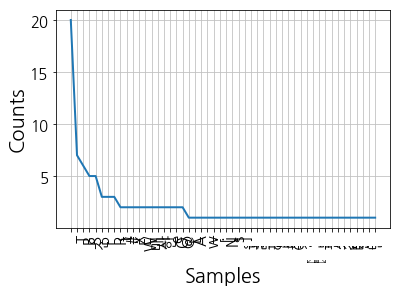

In [11]:
import nltk

ptr = 55
ind = list(df["text"])[ptr]
ko = nltk.Text(ind,name="idol")

print(ind)
print(ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

ko.vocab()
ko.plot(50)

In [ ]:
from konlpy.tag import Twitter
t = Twitter()
tags_ko = t.pos(ind)
tags_ko

#### 한글폰트 설정

In [9]:
f = open("dataM.txt",'w')
try:
    data = ind
    f.write(data)
    f.close()
except:
    print(ind)

RT @BTSLAB_twt: [#BTSxNEWs]
웸블리 매진→팝업스토어 장사진
🇬🇧한복판서 체감한 방탄소년단 인기

🏟6월 1~2일 #BTSxWembley
BTS POP-UP STORE 런던 뜨거운 관심
상품 구매, 사진 촬영, 노래, 춤 추며
축…


In [104]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None,fontext='ttf')
print(len(font_list))

959


In [105]:
[(f.name, f.name) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'NanumGothic'),
 ('NanumGothic', 'NanumGothic'),
 ('NanumGothic', 'NanumGothic'),
 ('NanumGothic', 'NanumGothic')]

In [8]:
font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()

print(font_family)

NanumGothic


In [9]:
font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

plt.rcParams['font.size'] = 24.
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['axes.labelsize'] = 20.

#### 단어

          Word  Counts       Per
0           rt       1  5.555556
1     tslabwt:       1  5.555556
2   tsxnews웸블리       1  5.555556
3        팝업스토어       1  5.555556
4         한복판서       1  5.555556
5          체감한       1  5.555556
6        방탄소년단       1  5.555556
7            월       1  5.555556
8           1일       1  5.555556
9   tsxwembley       1  5.555556
10         bts       1  5.555556
11        popp       1  5.555556
12       store       1  5.555556
13          런던       1  5.555556
14         뜨거운       1  5.555556
15          상품       1  5.555556
16          사진       1  5.555556
17           춤       1  5.555556
expect word 30 :           Word  Counts       Per
0           rt       1  5.555556
1     tslabwt:       1  5.555556
2   tsxnews웸블리       1  5.555556
3        팝업스토어       1  5.555556
4         한복판서       1  5.555556
5          체감한       1  5.555556
6        방탄소년단       1  5.555556
7            월       1  5.555556
8           1일       1  5.555556
9   tsxwembley       1  5.

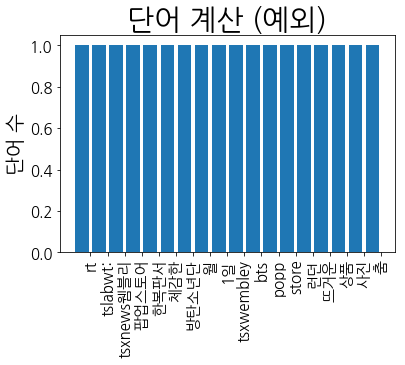

None expect word 30:           Word  Counts       Per
0           rt       1  5.555556
1     tslabwt:       1  5.555556
2   tsxnews웸블리       1  5.555556
3        팝업스토어       1  5.555556
4         한복판서       1  5.555556
5          체감한       1  5.555556
6        방탄소년단       1  5.555556
7            월       1  5.555556
8           1일       1  5.555556
9   tsxwembley       1  5.555556
10         bts       1  5.555556
11        popp       1  5.555556
12       store       1  5.555556
13          런던       1  5.555556
14         뜨거운       1  5.555556
15          상품       1  5.555556
16          사진       1  5.555556
17           춤       1  5.555556


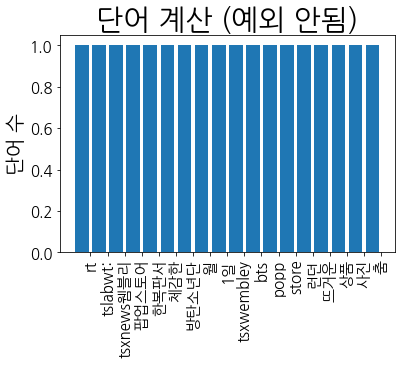

word 30: Empty DataFrame
Columns: [Number, Counts, Per]
Index: []


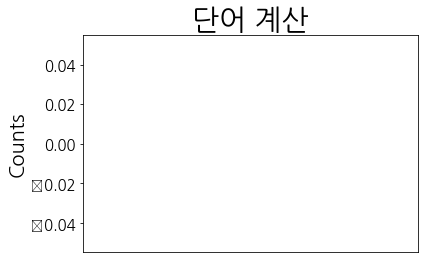

In [12]:
from collections import Counter
import re
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#utf8_f = codecs.open("dataM.txt", 'r', encoding = 'utf-8')

data = ind
parse = re.sub("[^0-9a-zA-Z\\s]+[^ ㄱ - ㅣ 가-힣]", "", data) # 특수문자 제거
parse = parse.lower().split()

counts = Counter(parse)
counts = counts.most_common()

# 이 부분 한글 인코딩 안되므로 인코딩 해결 시 처리
boundmorpheme = ["은", "는", "이", "가", "을", "를", "로써", "에서", "에게서", "부터", "까지", "에게", "한테", "께", "와", "과", "의", "로서", "으로서", "로", "으로"] # 조사
# 인코딩이랑 한글 형태소 분할해서 자료조사좀 하자

boundmorpheme = ["a", "the", "an", "for", "and" , "nor", "but", "or", "yey", "so", "i", "we", "me", "us", "some", "how", "just"]

exceptions = boundmorpheme

length = len(counts)
newcount = []
for i in range(length):
    if counts[i][0] not in exceptions:
        newcount.append(counts[i])

counts_to_frame = pd.DataFrame(counts, columns = ["Word", "Counts"])
countsum1 = sum(counts_to_frame["Counts"])
per1 = [(counts_to_frame["Counts"][i]/countsum1) * 100 \
        for i in range(len(counts_to_frame))]
counts_to_frame["Per"] = np.array(per1)

new_to_frame = pd.DataFrame(newcount, columns = ["Word", "Counts"])
countsum2 = sum(new_to_frame["Counts"])
per2 = [(new_to_frame["Counts"][i]/countsum2) * 100 \
        for i in range(len(new_to_frame))]
new_to_frame["Per"] = np.array(per2)

print(new_to_frame)
print("""expect word 30 :""", new_to_frame[:30])

# 예외 단어 30개
fword = [newcount[i][0] for i in range(len(newcount))][:30]
fnumber = [newcount[i][1] for i in range(len(newcount))][:30]
fxs = [i for i, _ in enumerate(fword)]
plt.bar(fxs, fnumber)
plt.ylabel("단어 수")
plt.title("단어 계산 (예외)")
plt.xticks([i + 0.5 for i, _ in enumerate(fword)], fword, rotation = 90)
plt.show()

print("""None expect word 30:""", counts_to_frame[:30])
# 예외 되지 않은 단어 30개
word = [counts[i][0] for i in range(len(counts))][:30]
number = [counts[i][1] for i in range(len(counts))][:30]
xs = [i for i, _ in enumerate(word)]
plt.bar(xs, number)
plt.ylabel("단어 수")
plt.title("단어 계산 (예외 안됨)")
plt.xticks([i + 0.5 for i, _ in enumerate(fword)], fword, rotation = 90)
plt.show()

#숫자 계산
numcount = []
for i in range(len(counts)):
    try :
        numcount.append((int(counts[i][0]), counts[i][1]))
    except ValueError:
        pass

numcount_to_frame = pd.DataFrame(numcount[:30], columns=["Number", "Counts"])
numsum = sum(numcount_to_frame["Counts"])
per3 = [(numcount_to_frame["Counts"][i]/numsum) * 100 \
        for i in range(len(numcount_to_frame))]
numcount_to_frame["Per"] = np.array(per3)
print("""word 30:""", numcount_to_frame)

numcount = numcount[:30]
num = [numcount[i][0] for i in range(len(numcount))][:30]
xs = [i for i, _ in enumerate (numcount)]

plt.bar(xs, numcount_to_frame["Counts"])
plt.ylabel("Counts")
plt.xticks([i + 0.5 for i, _ in enumerate (num)], num, rotation = 90)
plt.title("단어 계산")
plt.show()